# Entendendimento do Problema - AIRBNB

**Objetivo do problema:**

- 1.0 Previsão do primeiro destino que o um novo usuário irá escolher.

    - Porque?

        * Qual o tipo do modelo de negócio do Airbnb?

            * Marketplace (conectar oferta e demanda, e poder ganhar em cima dessa transação).

            * Oferta (Pessoas oferecem acomodação)

                -- Tamanho do portifólio
                -- Diversidade/densidade de portifólio.
                -- Preço médio.

            * Demanda (Pessoas procurando acomodação)

                -- Número de usuários
                -- LTV (Lifetime Value - Quanto que a pessoa vai gastar com a empresa)
                -- CAC (Client Acquisition Cost - Custo por cliente)

                Gross Revenue (Margem de lucro) = (fee * Número de usuário) - CAC
                
                **FEE => É a diferença entre o preço médio e o valor dado a pessoa que oferece a acomadação.**

- Proposta da Solução:

    - Modelo de predição do primeiro destino de um novo usuário. Tipo de entrega:

        * 1.0. Salvar a predição em tabelas no banco de dados para ser acessada por meio de uma ferramenta de visualização.
        * 2.0. Construção de API e acesso por meio dela:
        
            -- Input: Usuário coloca suas características.
            
            -- Output: Mostra as características do usuário e a **predição do destino**.

    - Ciclos para proposta de solução: 16 Ciclos.

# ETAPAS REALIZADAS NESSE CICLO:

 1. Data Description
 2. Feature engineering (Para melhorar a performance do modelo)

# Ciclo 04 <font color = 'red'> - Feature engineering </font>

# 0.0 Imports

In [1]:
import pandas   as pd
import numpy    as np
import seaborn  as sns
import random

from sklearn import model_selection as ms
from sklearn import preprocessing   as pp
from sklearn import metrics         as m
from scikitplot import metrics      as mt
import matplotlib.pyplot as plt 

from keras import models   as ml
from keras import layers   as l

## 0.1. Helper Functions

## 0.2. Loading Data

In [1]:
a = r'D:\CDS\Projetos\PA01\airbnb_predict\data\raw\train_users_2.csv'
df_raw = pd.read_csv(a, low_memory=False)
df_raw.shape

NameError: name 'pd' is not defined

In [ ]:
b = r'D:\CDS\Projetos\PA01\airbnb_predict\data\raw\sessions.csv'
df_sessions = pd.read_csv(b,low_memory=True)
df_sessions.shape

(10567737, 6)

In [ ]:
df_sessions.sample(2)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
10492906,rx161m73ef,edit,view,edit_profile,iPhone,11879.0
5669093,rotwqg8ssu,dashboard,view,dashboard,Windows Desktop,447.0


# 1.0. Data Description

## 1.1 Data Dimensions

In [ ]:
df1 = df_raw.copy()

In [ ]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of collumns: {}'.format(df1.shape[1]))

Number of rows: 213451
Number of collumns: 16


In [ ]:
print('Number of rows: {}'.format(df_sessions.shape[0]))
print('Number of collumns: {}'.format(df_sessions.shape[1]))

Number of rows: 10567737
Number of collumns: 6


In [ ]:
df1.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
df_sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


## 1.2 Data type:

In [ ]:
df_sessions.dtypes

user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object

In [ ]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

Obs: A coluna date_account_created e timestamp_first_active tem que ser Datetime.

## 1.3 NA check:

### 1.3.0 Dados sessions

In [ ]:
# Dados sessions
df_sessions.isna().sum() / len(df_sessions)

user_id          0.003264
action           0.007535
action_type      0.106570
action_detail    0.106570
device_type      0.000000
secs_elapsed     0.012872
dtype: float64

In [ ]:
# Remove or replace missing values
# Como há mais de 10 milhões de linhas, vamos está retirando todas com valores nulos.

# user_id 
df_sessions = df_sessions[~df_sessions['user_id'].isna()]

# action
df_sessions = df_sessions[~df_sessions['action'].isna()]

# action_type
df_sessions = df_sessions[~df_sessions['action_type'].isna()]

# device_type
df_sessions = df_sessions[~df_sessions['device_type'].isna()]

# secs_elapsed
df_sessions = df_sessions[~df_sessions['secs_elapsed'].isna()]


In [ ]:
df_sessions.isna().sum() / len(df_sessions)

user_id          0.0
action           0.0
action_type      0.0
action_detail    0.0
device_type      0.0
secs_elapsed     0.0
dtype: float64

### 1.3.1 Dados df1

In [ ]:
df1.isna().sum() / len(df1)

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.000000
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

In [ ]:
# Verificando o quanto de linhas com dados faltantes no atributo date_first_booking tem para cada classe
aux = df1[df1['date_first_booking'].isna()]
aux['country_destination'].value_counts(normalize=True)

NDF    1.0
Name: country_destination, dtype: float64

In [ ]:
# Verificando o quanto de linhas com dados faltantes no atributo age tem para cada classe
aux = df1[df1['age'].isna()]
aux['country_destination'].value_counts(normalize=True)

# não há problema em ter os dados faltantes distribuidos em um atributo quase que na msm proporção de distribuição das classes

NDF      0.768428
US       0.156529
other    0.028617
FR       0.014888
IT       0.009081
GB       0.006251
ES       0.006171
CA       0.003989
DE       0.002387
NL       0.001818
AU       0.001171
PT       0.000671
Name: country_destination, dtype: float64

Text(0.5, 1.0, 'Histograma da idade dos clientes menores que 80 anos')

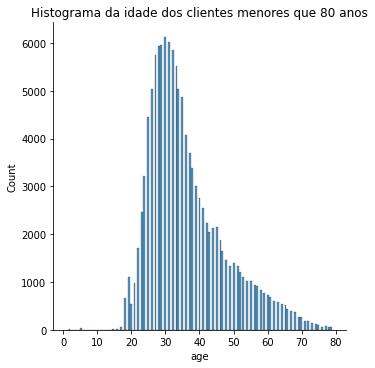

In [ ]:
sns.displot(df1[df1['age']<80]['age'])
plt.title('Histograma da idade dos clientes menores que 80 anos')

**Obeservação:** Se a distribuição dos dados for semelhante a uma normal, poderá ser adicionado uma média nos dados faltantes sem necessariamente dar um viés.

O lance é descobrir o tipo de distribuição da variável original, e a partir dessa descoberta, identificar qual medida relativa que representa a distribuição, e que possa ser imputada aos dados faltantes sem dar viés aos dados (Interferir na sua distribuição normal).

In [19]:
# Verificando como o atributo se qualifica
df1['first_affiliate_tracked'].drop_duplicates()

# Por ser dados categóricos e por ter poucos dados em comparação com o total (apenas 3%), então podemos excluir os dados faltantes.

0            untracked
5                  omg
12                 NaN
13              linked
79       tracked-other
257            product
6270         marketing
11184        local ops
Name: first_affiliate_tracked, dtype: object

In [20]:
# Remove missing values
#df1 = df1.dropna()
# For df1

# date_first_booking - Como não há dados atualizados, iremos pegar a data máxima e subtrair com a data de entrada
date_first_booking_max = pd.to_datetime(df1['date_first_booking']).max().strftime('%Y-%m-%d')

df1['date_first_booking'] = df1['date_first_booking'].fillna( date_first_booking_max)
# age
avg_age = df1['age'].mean().astype(int)
df1['age'] = df1['age'].fillna(avg_age)

# first_affiliate_tracked
df1 = df1[~df1['first_affiliate_tracked'].isna()]


In [21]:
# Validando os NA Check
df1.isna().sum() / len(df1)

id                         0.0
date_account_created       0.0
timestamp_first_active     0.0
date_first_booking         0.0
gender                     0.0
age                        0.0
signup_method              0.0
signup_flow                0.0
language                   0.0
affiliate_channel          0.0
affiliate_provider         0.0
first_affiliate_tracked    0.0
signup_app                 0.0
first_device_type          0.0
first_browser              0.0
country_destination        0.0
dtype: float64

## 1.4 Change Data Type:

In [22]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [23]:
df1.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,2015-06-29,-unknown-,49.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,2015-06-29,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [24]:
# date_account_created
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])
# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')

# date_first_booking
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])
# age
df1['age']=df1['age'].astype(np.int64)

In [25]:
df1.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

## 1.5 Check balanced data:

In [26]:
# Número de classes
df1['country_destination'].unique()

array(['NDF', 'US', 'other', 'CA', 'FR', 'ES', 'GB', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

In [27]:
# Observando o balanceamento da variável resposta
df1['country_destination'].value_counts(normalize=True)

# Obs: Ao excluir as linhas vazias, foi excluído todo uma classe. (NDF = na)

NDF      0.579673
US       0.294461
other    0.048128
FR       0.023623
IT       0.013458
GB       0.011066
ES       0.010671
CA       0.006707
DE       0.005020
NL       0.003621
AU       0.002541
PT       0.001032
Name: country_destination, dtype: float64

## 1.6 Data Description

### 1.6.0 General
- Separar os dados em categórico, númerico e data.

In [29]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude= ['int64','float64','datetime64[ns]'])
time_attributes = df1.select_dtypes( include=['datetime64[ns]'])

### 1.6.1 Numerical - users

Estatística descritiva de 1º ordem: 
* Medidas de tendência central: Média, mediana
* Dispersões: Desvio padrão, min, máx, skew, curtosis.

In [41]:
# Central Tendency - Mean, Median

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersions - Std, Min, Max, Range, Skew, Kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concat
ct = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
ct.columns = ['Attributes', 'min','max','range','mean', 'median', 'std', 'skew', 'kurtosis']
ct

,Attributes,min,max,range,mean,median,std,skew,kurtosis
0,age,1.0,2014.0,2013.0,49.183142,49.0,118.421689,16.333820,267.655434
1,signup_flow,0.0,25.0,25.0,3.151490,0.0,7.543915,2.287158,3.567794


In [43]:
num_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
age,207386.0,49.183142,118.421975,1.0,32.0,49.0,49.0,2014.0
signup_flow,207386.0,3.151490,7.543933,0.0,0.0,0.0,0.0,25.0


### 1.6.2 Numerical - Sessions

# 2.0. Data Filtering

In [44]:
df = df1.copy()

In [45]:
df2=df1.copy()

## 2.1. Filtering rows

In [ ]:
df

## 2.2. Columns selection

# 3.0 Data Preparation

In [1]:
df3=df2.copy()

NameError: name 'df2' is not defined

In [56]:
cols_categoric = ['gender',
                'signup_method',
                'language',
                'affiliate_channel',
                'affiliate_provider',
                'first_affiliate_tracked',
                'signup_app',
                'first_device_type',
                'first_browser']
# dummy variable
df_dummy = pd.get_dummies( df3.drop( ['id','country_destination'], axis=1 ) ) # Retirando as variáveis do ID e a variável resposta (target)

#join id and country destination 
df = pd.concat( [df3[['id','country_destination']],df_dummy], axis=1 )

In [57]:
df.head()

,id,country_destination,date_account_created,timestamp_first_active,date_first_booking,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,...,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,gxn3p5htnn,NDF,2010-06-28,2009-03-19 04:32:55,2015-06-29,49,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,NDF,2011-05-25,2009-05-23 17:48:09,2015-06-29,38,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,US,2010-09-28,2009-06-09 23:12:47,2010-08-02,56,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,other,2011-12-05,2009-10-31 06:01:29,2012-09-08,42,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,US,2010-09-14,2009-12-08 06:11:05,2010-02-18,41,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4.0. Feature Selection

In [58]:
df.sample().T

,57055
id,q8ghrdjg3j
country_destination,other
date_account_created,2013-01-22 00:00:00
timestamp_first_active,2013-01-22 18:37:16
date_first_booking,2013-01-23 00:00:00
...,...
first_browser_Stainless,0
first_browser_TenFourFox,0
first_browser_TheWorld Browser,0
first_browser_Yandex.Browser,0


In [59]:
cols_drop = ['id','date_account_created','timestamp_first_active','date_first_booking'] # Original Dates
df=df.drop(cols_drop,axis=1)
#df.dtypes

In [60]:
X = df.drop('country_destination', axis=1)
y = df['country_destination'].copy()

In [61]:
X

,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_ca,...,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,49,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,56,3,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,32,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213447,49,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213448,32,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213449,49,25,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5.0. Machine Learning Model 

In [62]:
# Split Dataset into training and test
x_train, x_test, y_train, y_test = ms.train_test_split(
                                                        X,
                                                        y,
                                                        test_size = 0.25,
                                                        random_state=42
                                                        )

## 5.1. Baseline Model
- Inserindo um modelo que realizar a classifição da amostragem de forma aleatória, com os devidos pesos.


In [63]:
country_destination_weights = df1['country_destination'].value_counts(normalize = True).sort_index().tolist()

In [64]:
k_num = y_test.shape[0]

In [65]:
country_destination_list = df1['country_destination'].drop_duplicates().sort_values().tolist()

In [66]:
# Modelo que faz a aleatoriazação da target
yhat_random = random.choices(
                            population = country_destination_list,
                            weights = country_destination_weights,
                            k= k_num )
len(yhat_random)

51847

## 5.2. Neural Network - MLP

In [74]:
#y_train.values # Tem que transformar em valores numéricos. Utiliza-se o One Hot Encoding

array(['GB', 'US', 'NDF', ..., 'US', 'NDF', 'NDF'], dtype=object)

In [73]:
#y_train.values.reshape(-1,1)

array([['GB'],
       ['US'],
       ['NDF'],
       ...,
       ['US'],
       ['NDF'],
       ['NDF']], dtype=object)

In [69]:
ohe = pp.OneHotEncoder()
y_ohe = y_train.values.reshape(-1,1)
y_train_nn = ohe.fit_transform(y_ohe).toarray()

In [76]:
#y_train_nn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
# Model definition
model = ml.Sequential()
model.add( l.Dense (
                100,
                input_dim =x_train.shape[1],
                activation = 'relu' 
                ) ) # Irá adicionar as Layers da rede neural .. Camada de entrada

model.add( l.Dense (
                    12, #11 por causa do número de saídas
                    activation = 'softmax' 
                    )
                    )

# Model compile
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# train model
model.fit(x_train, y_train_nn, epochs=100)

Epoch 1/100
4861/4861 [==============================] - ETA: 0s - loss: 1.2390 - accuracy: 0.58 - 14s 2ms/step - loss: 1.2389 - accuracy: 0.5880
Epoch 2/100
4861/4861 [==============================] - 7s 1ms/step - loss: 1.1581 - accuracy: 0.6066
Epoch 3/100
4861/4861 [==============================] - 6s 1ms/step - loss: 1.1225 - accuracy: 0.6152
Epoch 4/100
4861/4861 [==============================] - 7s 1ms/step - loss: 1.0999 - accuracy: 0.6200
Epoch 5/100
4861/4861 [==============================] - 7s 1ms/step - loss: 1.0895 - accuracy: 0.6199
Epoch 6/100
4861/4861 [==============================] - 7s 1ms/step - loss: 1.0864 - accuracy: 0.6201
Epoch 7/100
4861/4861 [==============================] - 6s 1ms/step - loss: 1.0846 - accuracy: 0.6213
Epoch 8/100
4861/4861 [==============================] - 6s 1ms/step - loss: 1.0840 - accuracy: 0.6208
Epoch 9/100
4861/4861 [==============================] - ETA: 0s - loss: 1.0834 - accuracy: 0.62 - 6s 1ms/step - loss: 1.0831 - accur

# 6.0. Performance

## 6.1. NN - Performance

In [77]:
# prediction 
pred_nn = model.predict( x_test )

In [78]:
# Invert prediction
yhat_nn = ohe.inverse_transform( pred_nn )

In [80]:
# Prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape(1 , -1 )[0]

In [81]:
yhat_nn

array(['US', 'NDF', 'NDF', ..., 'NDF', 'NDF', 'NDF'], dtype=object)

Accuracy: 0.624240553937547
Balanced Accuracy: 0.1051229596091892
Kappa Score: 0.22117942467561824


d:\CDS\Projetos\PA01\airbnb_predict\airbnb\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\CDS\Projetos\PA01\airbnb_predict\airbnb\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\CDS\Projetos\PA01\airbnb_predict\airbnb\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       123
          CA       0.00      0.00      0.00       360
          DE       0.00      0.00      0.00       268
          ES       0.00      0.00      0.00       537
          FR       0.00      0.00      0.00      1229
          GB       0.00      0.00      0.00       611
          IT       0.00      0.00      0.00       696
         NDF       0.66      0.89      0.76     30076
          NL       0.00      0.00      0.00       211
          PT       0.00      0.00      0.00        61
          US       0.50      0.37      0.43     15145
       other       0.17      0.00      0.00      2530

    accuracy                           0.62     51847
   macro avg       0.11      0.11      0.10     51847
weighted avg       0.54      0.62      0.56     51847



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

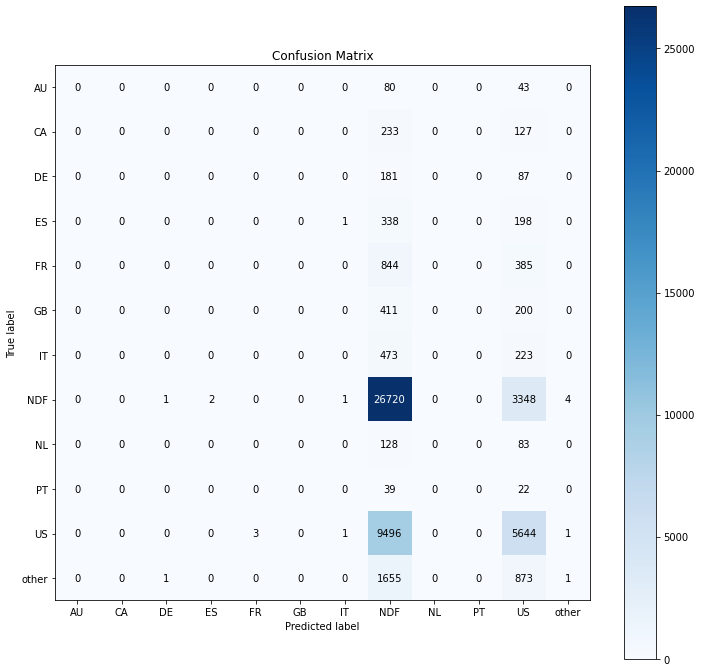

In [82]:
# Accuracy
acc_nn = m.accuracy_score( 
                y_test_nn, 
                yhat_nn
                )
print('Accuracy: {}'.format(acc_nn))
# Balanced accury Score

b_acc_nn = m.balanced_accuracy_score(
                        y_test_nn,
                        yhat_nn
                            )
print('Balanced Accuracy: {}'.format(b_acc_nn))

# Kappa Metrics
kappa_nn = m.cohen_kappa_score(
                            y_test_nn,
                            yhat_nn
                                )
print('Kappa Score: {}'.format(kappa_nn))

# Classification report
print(m.classification_report(y_test_nn, yhat_nn))


# Confusion Matrix
mt.plot_confusion_matrix(
                        y_test_nn,
                        yhat_nn, 
                        normalize=False, 
                        figsize=(12,12)
                        )

 O weighted avg é a média ponderada das métricas logo acima.

## 6.2. Baseline Model - Performance

Accuracy: 0.42449900669276913
Balanced Accuracy: 0.08216466204056878
Kappa Score: -0.000993723605408503
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       123
          CA       0.01      0.01      0.01       360
          DE       0.00      0.00      0.00       268
          ES       0.01      0.01      0.01       537
          FR       0.02      0.02      0.02      1229
          GB       0.01      0.01      0.01       611
          IT       0.01      0.01      0.01       696
         NDF       0.58      0.58      0.58     30076
          NL       0.01      0.01      0.01       211
          PT       0.00      0.00      0.00        61
          US       0.29      0.29      0.29     15145
       other       0.05      0.05      0.05      2530

    accuracy                           0.42     51847
   macro avg       0.08      0.08      0.08     51847
weighted avg       0.42      0.42      0.42     51847



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

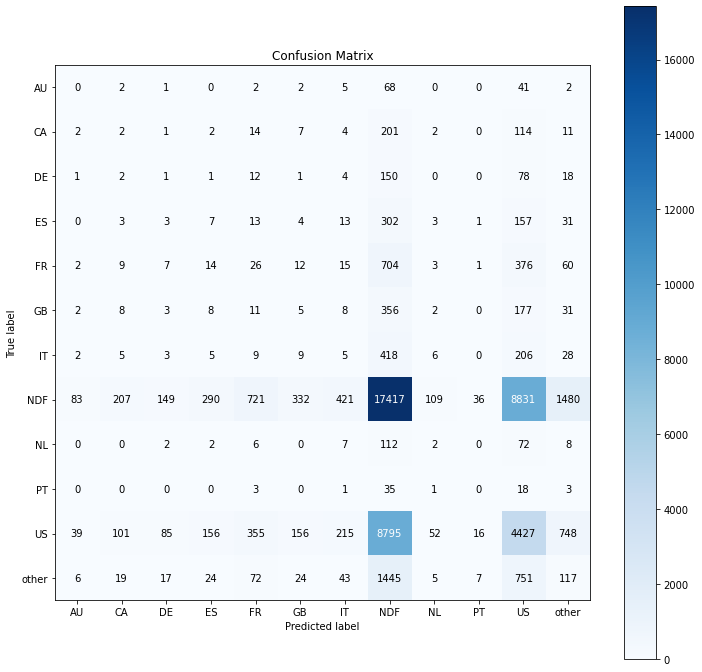

In [84]:
# Accuracy
acc_random = m.accuracy_score( 
                y_test_nn, 
                yhat_random
                )
print('Accuracy: {}'.format(acc_random))
# Balanced accury Score

b_acc_random = m.balanced_accuracy_score(
                        y_test_nn,
                        yhat_random
                            )
print('Balanced Accuracy: {}'.format(b_acc_random))

# Kappa Metrics
kappa_random = m.cohen_kappa_score(
                            y_test_nn,
                            yhat_random
                                )
print('Kappa Score: {}'.format(kappa_random))

# Classification report
print(m.classification_report(y_test_nn, yhat_random))


# Confusion Matrix
mt.plot_confusion_matrix(
                        y_test_nn,
                        yhat_random, 
                        normalize=False, 
                        figsize=(12,12)
                        )

## 6.3. NN  Performance: Cross-validation (Essa parte é realizada somente no final do ciclo )

* O cross-validation é feito apenas no final, somente depois do Tuning-Fine.
* A entrega das métricas para o time de negócio são aquelas realizadas a partir da validação cruzada.
* Para essa processo se faz necessário aplicar processos de paralelização (Ou seja, o laço irá rodar em 5 threads).

In [86]:
# Criar uma lista para as métricas
balanced_acc_list = []
kappa_acc_list = []

# Generate k-fold
num_folds = 5
k_fold = ms.StratifiedKFold(n_splits=num_folds,
                    shuffle=True,
                    random_state=42)

i = 1
for train_ix, val_ix in k_fold.split(x_train, y_train): # Mantém a proporção das classes
# Para cada iteração vms ter um conjunto de indíces diferentes
    print('Fold Number: {}/{}'.format(i,num_folds))

    # Get fold
    x_train_fold = x_train.iloc[train_ix]
    y_train_fold = y_train.iloc[train_ix]

    x_val_fold = x_train.iloc[val_ix]
    y_val_fold = y_train.iloc[val_ix]

    # Target hot-encoding
    ohe = pp.OneHotEncoder()
    y_train_fold_nn = ohe.fit_transform(y_train_fold.values.reshape(-1,1)).toarray() #Convertendo a classe em um array

    # Model definition
    model = ml.Sequential()

    model.add(l.Dense(256, #Números de neurônios na camada escondida
                    input_dim= x_train.shape[1], # Números de entrada na minha rede (camada de entrada)
                    activation= 'relu' # Função de ativação da rede neural (essa função agrega todos os pesos dos nós)
                    ))
    model.add(l.Dense(12, # Número de neurônios na camada de saída deve ser igual ao número de classes para o modelo.
                    activation= 'softmax' # Essa função de ativação é muito usada em problemas de multiclasse.
                    ))
    # Compile model
    model.compile(
                loss = 'categorical_crossentropy', #função de perda
                optimizer = 'adam', # Função de otimização
                metrics = ['accuracy'] # Métrica utilizada
                )

    # training model
    model.fit(x_train_fold, 
                y_train_fold_nn, 
                epochs = 100, # Quantas vezes irá passar pelo dataset
                batch_size = 32,
                verbose = 0
                )

    # Prediction
    pred_nn = model.predict(x_val_fold)
    yhat_nn = ohe.inverse_transform(pred_nn) # Dados da variável target preditos

    # Prepare Data

    y_test_nn = y_val_fold.to_numpy()
    yhat_nn = yhat_nn.reshape(1,-1)[0]

    # Metrics
    ## Balanced Accuracy
    balanced_acc_nn = m.balanced_accuracy_score(y_test_nn, yhat_nn)
    balanced_acc_list.append(balanced_acc_nn)

    ## Kappa metrics
    kappa_acc_nn = m.cohen_kappa_score(y_test_nn, yhat_nn)
    kappa_acc_list.append(kappa_acc_nn)
    
    i += 1

Fold Number: 1/5
Fold Number: 2/5
Fold Number: 3/5
Fold Number: 4/5
Fold Number: 5/5


In [87]:
print(f'Avg Balanced Accuracy: {np.round(np.mean(balanced_acc_list),2)} +/- {np.round(np.std(balanced_acc_list), 4)}')
print(f'Avg Kappa : {np.round(np.mean(kappa_acc_list),2)} +/- {np.round(np.std(kappa_acc_list), 4)}')

Avg Balanced Accuracy: 0.1 +/- 0.0018
Avg Kappa : 0.22 +/- 0.015
